# League of Legends Music Analysis

## Data Analysis using SQL connection

### Import Libary

In [289]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [290]:
plt.rcParams["font.family"] = "Poppins"

### Build SQL Connection

In [291]:
import sqlalchemy
username = 'root'
password = '****blindpassword****'
host = 'localhost'
database= 'lolmusic'
db_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(username, password, 
                                                      host, database))

## League of Legends

### Monthly Active User Trends

In [292]:
game_stat_mau_year = pd.read_sql("SELECT year FROM game_stat WHERE monthly_active_user IS NOT NULL", db_connection)
game_stat_mau = pd.read_sql("SELECT monthly_active_user FROM game_stat WHERE monthly_active_user IS NOT NULL", db_connection)

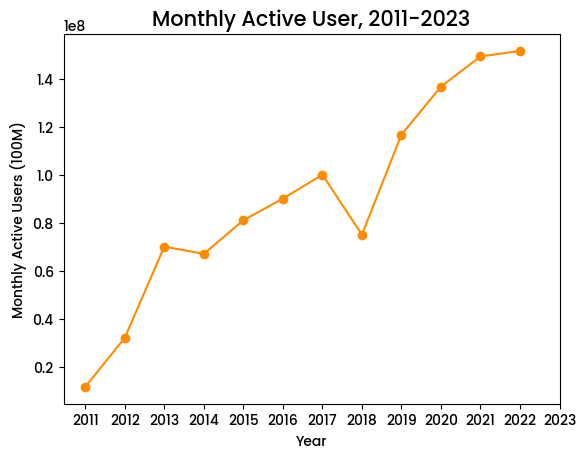

In [293]:
plt.plot(game_stat_mau_year, game_stat_mau, color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Monthly Active Users (100M)")
plt.title("Monthly Active User, 2011-2023", fontsize = 15)

plt.xticks([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

# Display

plt.show()

### Total Revenue from League of Legends

In [294]:
game_stat_rev_year = pd.read_sql("SELECT year FROM game_stat WHERE revenue IS NOT NULL", db_connection)
game_stat_revenue = pd.read_sql("SELECT revenue FROM game_stat WHERE revenue IS NOT NULL", db_connection)

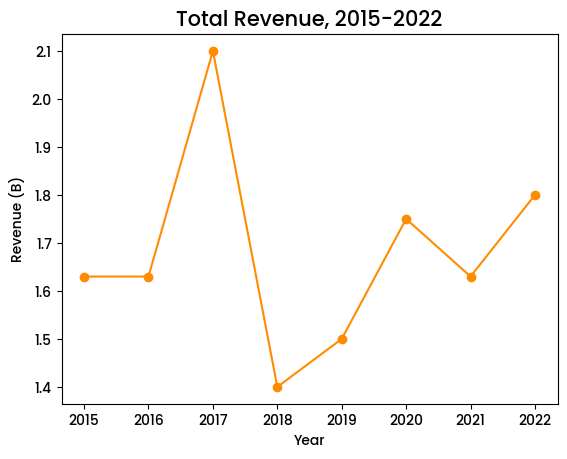

In [295]:
plt.plot(game_stat_rev_year, game_stat_revenue, color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Revenue (B)")
plt.title("Total Revenue, 2015-2022", fontsize = 15)

# Display

plt.show()

### Comparison with other games

In [296]:
other_games= pd.read_sql("SELECT game, monthly_active_players, EXTRACT(year from release_date) as release_year FROM other_games ORDER BY release_date DESC", db_connection)
other_games

,game,monthly_active_players,release_year
0,Genshin Impact,63000000,2020
1,Valorant,22000000,2020
2,Call of Duty: Warzone,53000000,2020
3,Apex Legends,63000000,2019
4,Fortnite,263000000,2017
5,PUBG,376000000,2017
6,Counter-Strike: Global Offensive,35000000,2012
7,Minecraft,171000000,2011
8,League of Legends,152000000,2009
9,Roblox,205000000,2006


In [297]:
other_games_game = other_games["game"]
other_games_mau = other_games["monthly_active_players"]

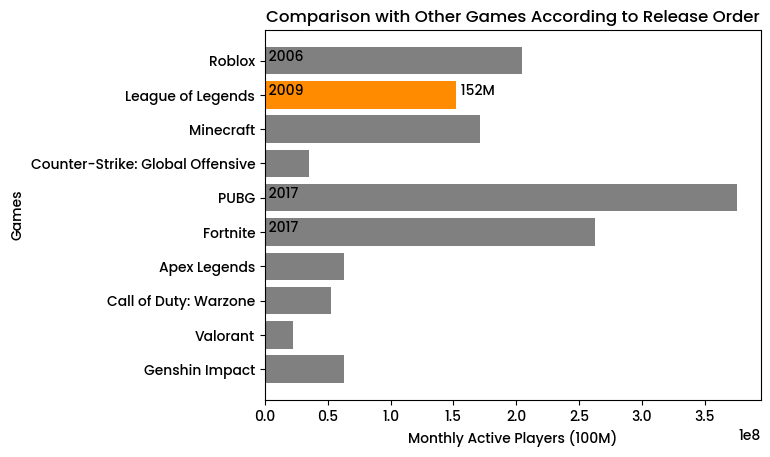

In [298]:
plt.barh(other_games_game, other_games_mau, color = ("grey","grey","grey","grey","grey","grey","grey","grey","darkorange","grey"))

# Labelling 

plt.xlabel("Monthly Active Players (100M)")
plt.ylabel("Games")
plt.title("Comparison with Other Games According to Release Order")
plt.text(9, 9, " 2006")
plt.text(8, 8, " 2009")
plt.text(8, 8, "                                                      152M")
plt.text(5, 5, " 2017")
plt.text(4, 4, " 2017")

# Display

plt.show()

### Player Demographic

In [299]:
player_demographic = pd.read_sql("SELECT * FROM player_dmgp", db_connection)
player_demographic

,feature_id,category,category_detail,value_number
0,0,Gender,Male,87
1,1,Gender,Female,12
2,2,Gender,Non-Binary,1
3,3,Age Group,Under 18,10
4,4,Age Group,18-20,27
5,5,Age Group,21-24,37
6,6,Age Group,25-30,22
7,7,Age Group,31-35,3
8,8,Age Group,36 and over,1
9,9,Consumer Pattern,Only watch streams,26


In [300]:
player_demographic_gender = pd.read_sql("SELECT * FROM player_dmgp WHERE category = 'Gender'", db_connection)
player_demographic_gender 

,feature_id,category,category_detail,value_number
0,0,Gender,Male,87
1,1,Gender,Female,12
2,2,Gender,Non-Binary,1


In [301]:
player_demographic_gender_detail = player_demographic_gender["category_detail"]
player_demographic_gender_value = player_demographic_gender["value_number"]

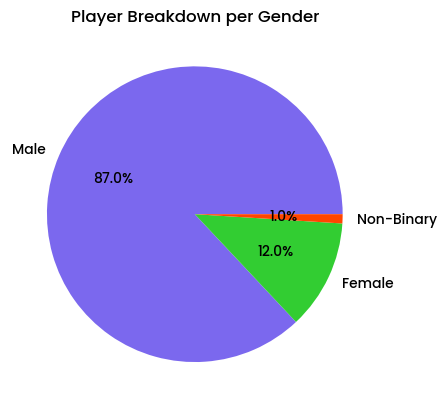

In [302]:
fig, ax = plt.subplots()
ax.pie(player_demographic_gender_value, labels=player_demographic_gender_detail, colors = ("mediumslateblue", "limegreen", "orangered"), autopct='%.1f%%')
plt.title("Player Breakdown per Gender")
plt.show()

In [303]:
player_demographic_agegroup = pd.read_sql("SELECT * FROM player_dmgp WHERE category = 'Age Group' ORDER BY feature_id DESC", db_connection)
player_demographic_agegroup

,feature_id,category,category_detail,value_number
0,8,Age Group,36 and over,1
1,7,Age Group,31-35,3
2,6,Age Group,25-30,22
3,5,Age Group,21-24,37
4,4,Age Group,18-20,27
5,3,Age Group,Under 18,10


In [304]:
player_demographic_agegroup_detail = player_demographic_agegroup["category_detail"]
player_demographic_agegroup_value = player_demographic_agegroup["value_number"]

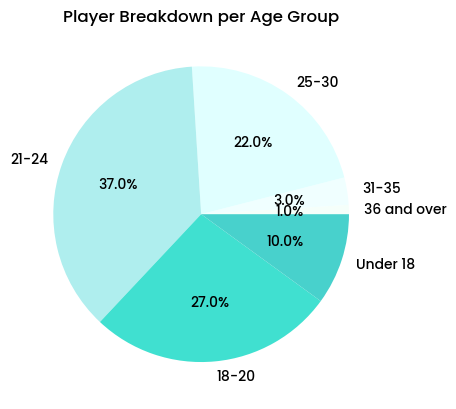

In [305]:
fig, ax = plt.subplots()
ax.pie(player_demographic_agegroup_value, labels=player_demographic_agegroup_detail, colors = ("mintcream", "azure", "lightcyan","paleturquoise","turquoise","mediumturquoise","darkturquoise"), autopct='%.1f%%')
plt.title("Player Breakdown per Age Group")
plt.show()

In [306]:
player_demographic_consume = pd.read_sql("SELECT * FROM player_dmgp WHERE category = 'Consumer Pattern'", db_connection)
player_demographic_consume

,feature_id,category,category_detail,value_number
0,9,Consumer Pattern,Only watch streams,26
1,10,Consumer Pattern,Watch streams & play,42
2,11,Consumer Pattern,Only play,32


In [307]:
player_demographic_consume_detail = player_demographic_consume["category_detail"]
player_demographic_consume_value = player_demographic_consume["value_number"]

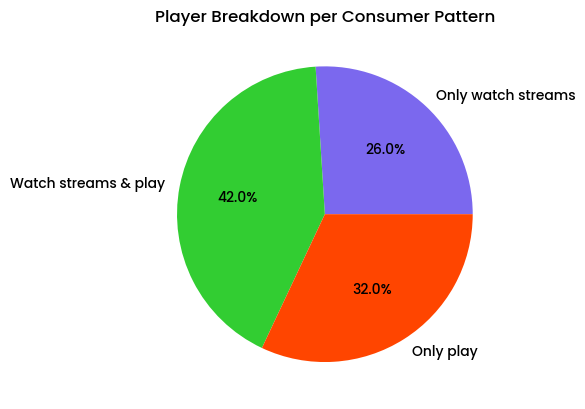

In [308]:
fig, ax = plt.subplots()
ax.pie(player_demographic_consume_value, labels= player_demographic_consume_detail, colors = ("mediumslateblue", "limegreen", "orangered"), autopct='%.1f%%')
plt.title("Player Breakdown per Consumer Pattern")
plt.show()

In [309]:
player_demographic_loc = pd.read_sql("SELECT * FROM player_dmgp WHERE category = 'Country/Region' ORDER BY value_number ASC", db_connection)
player_demographic_loc

,feature_id,category,category_detail,value_number
0,22,Country/Region,Japan,1736489
1,21,Country/Region,Oceania,2746903
2,20,Country/Region,Russia,4888207
3,18,Country/Region,Turkey,7727140
4,17,Country/Region,Brazil,11488731
5,19,Country/Region,South America,12850533
6,16,Country/Region,Nord & East Europe,18428816
7,15,Country/Region,South Korea,19822124
8,14,Country/Region,North America,27889684
9,13,Country/Region,West Europe,34830785


In [310]:
player_demographic_loc_detail = player_demographic_loc["category_detail"]
player_demographic_loc_value = player_demographic_loc["value_number"]

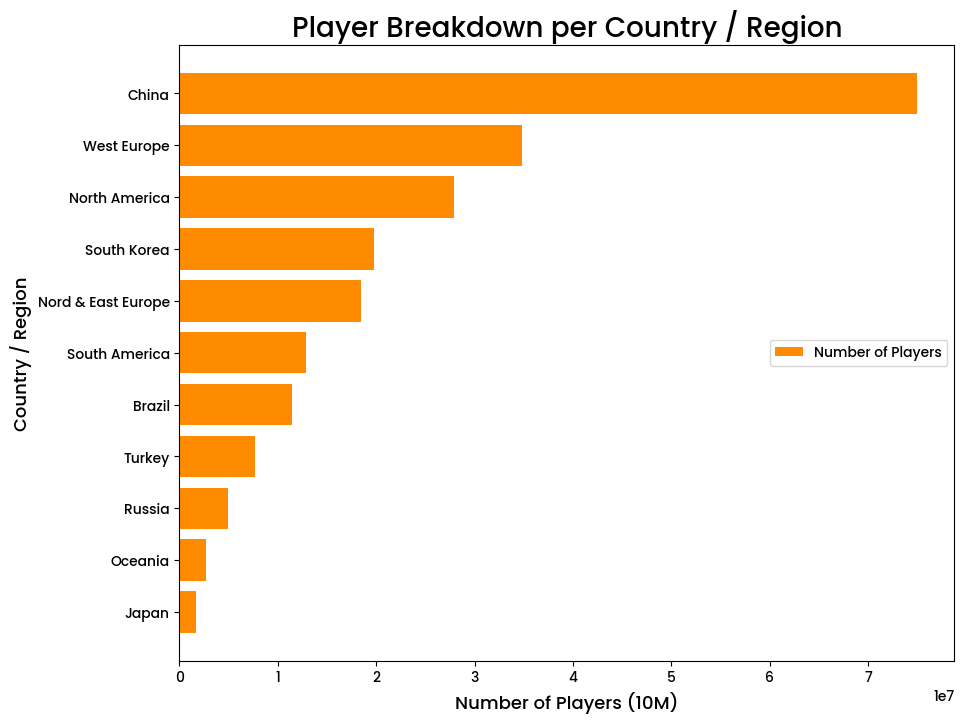

In [311]:
plt.figure(figsize=(10,8))

plt.barh(player_demographic_loc_detail, player_demographic_loc_value, color = "darkorange", label = 'Number of Players')
  
plt.xlabel("Number of Players (10M)", fontsize = 13)
plt.ylabel("Country / Region", fontsize = 13)
plt.title("Player Breakdown per Country / Region", fontsize = 20)

plt.legend(fontsize = 10, loc=5)
plt.show()

## Music Overall Stats Analysis

In [312]:
music_all = pd.read_sql("SELECT * FROM music_info", db_connection)
music_all.head(3)

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail
0,1,Thornmail,Pentakill,None,Metal,Smite and Ignite,2014,03:44,224,IP Variation,Project Group,Pentakill
1,2,Last Whisper,Pentakill,None,Metal,Smite and Ignite,2014,03:38,218,IP Variation,Project Group,Pentakill
2,3,Ohmwrecker,Pentakill,None,Metal,Smite and Ignite,2014,05:18,318,IP Variation,Project Group,Pentakill


In [313]:
album_counts = pd.read_sql("SELECT mi.category, ai.release_year, mi.release_for, count(distinct ai.album_id) as counts FROM album_info as ai JOIN music_info as mi ON ai.album_title = mi.album_title GROUP BY mi.category, ai.release_year, mi.release_for", db_connection)
album_counts.head()

,category,release_year,release_for,counts
0,E-Sports,2014,Esports Event,1
1,E-Sports,2015,Esports Event,1
2,E-Sports,2016,Esports Event,1
3,E-Sports,2017,Esports Event,2
4,E-Sports,2018,Esports Event,10


In [314]:
album_counts_pivot = pd.pivot_table(album_counts,
                    index = 'category', 
                    columns = 'release_year',
                     values = 'counts',
                     aggfunc = 'sum').fillna(0).astype(int)
album_counts_pivot

release_year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,,,
E-Sports,1,1,1,2,10,9,4,5,4,2
IP Variation,2,0,1,2,0,7,3,9,1,6
Original Game,0,3,2,0,0,29,12,14,12,7


In [315]:
music_overall_stat = pd.read_sql("SELECT category, release_year, count(track_id) as counts, sum(duration_second) as sum_duration, avg(duration_second) as avg_duration FROM music_info GROUP BY category, release_year", db_connection)
music_overall_stat.head()

,category,release_year,counts,sum_duration,avg_duration
0,IP Variation,2014,8,1829.0,228.6250
1,E-Sports,2014,1,170.0,170.0000
2,Original Game,2015,17,3378.0,198.7059
3,E-Sports,2015,1,216.0,216.0000
4,Original Game,2016,2,358.0,179.0000


In [316]:
track_counts_pivot = pd.pivot_table(music_overall_stat,
                     index = 'category',
                     columns = 'release_year',
                     values = 'counts',
                     aggfunc = 'sum').fillna(0).astype(int)
total_duration_pivot = pd.pivot_table(music_overall_stat,
                     index = 'category',
                     columns = 'release_year',
                     values = 'sum_duration',
                     aggfunc = 'sum').fillna(0).astype(int)

In [317]:
track_counts_pivot

release_year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,,,
E-Sports,1,1,1,2,10,11,4,5,4,2
IP Variation,8,0,11,11,0,20,8,201,30,117
Original Game,0,17,2,0,0,200,12,14,12,12


In [318]:
total_duration_pivot

release_year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
category,,,,,,,,,,
E-Sports,170,216,195,402,1707,1677,778,1007,818,413
IP Variation,1829,0,2819,2948,0,2731,1562,28784,5915,22394
Original Game,0,3378,358,0,0,33796,2662,2927,2689,2736


### Counts & Stream Stats - Category Breakdown

In [319]:
music_stream_category = pd.read_sql("SELECT mi.category, COUNT(mi.track_id) AS counts, sum(ms.spotify_stream) as total_spotify_stream, sum(ms.youtube_views) as total_youtube_views FROM music_info as mi JOIN music_stream_stat as ms ON mi.track_id = ms.track_id GROUP BY category ORDER BY total_spotify_stream ASC", db_connection)
music_stream_category

,category,counts,total_spotify_stream,total_youtube_views
0,Original Game,269,4.489501e+08,6.308577e+08
1,IP Variation,406,2.490638e+09,1.868232e+09
2,E-Sports,41,2.498357e+09,1.570148e+09


In [320]:
category_category = music_stream_category["category"]
category_counts = music_stream_category["counts"]
category_total_spotify_stream = music_stream_category["total_spotify_stream"]
category_total_youtube_views = music_stream_category["total_youtube_views"]

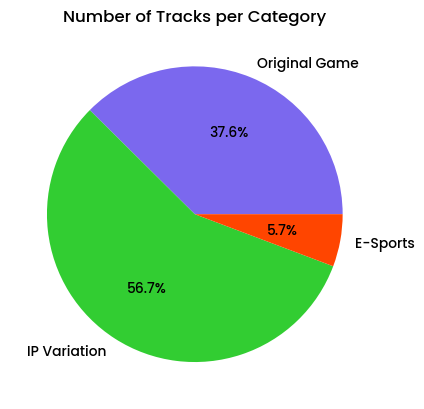

In [321]:
fig, ax = plt.subplots()
ax.pie(category_counts, labels=category_category, colors = ("mediumslateblue", "limegreen", "orangered"), autopct='%.1f%%')
plt.title("Number of Tracks per Category")
plt.show()

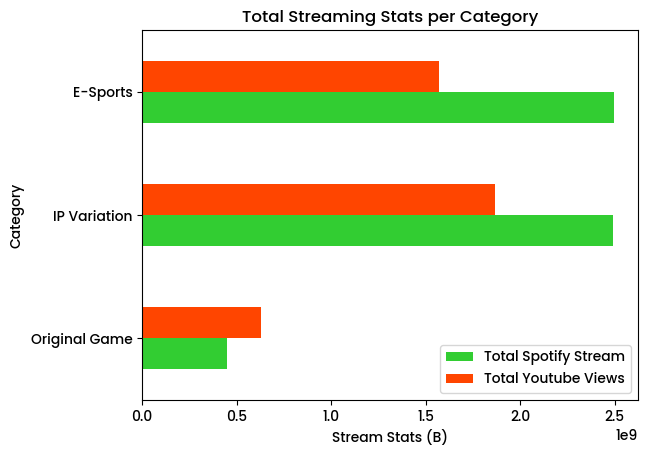

In [322]:
music_stream_category[["category","total_spotify_stream","total_youtube_views"]].plot.barh(x = "category", color = ("limegreen","orangered"))

plt.xlabel("Stream Stats (B)")
plt.ylabel("Category")
plt.title("Total Streaming Stats per Category")

plt.legend(("Total Spotify Stream", "Total Youtube Views"), loc=4)
plt.show()

### Counts & Stream Stats - According to Release Year

In [323]:
music_stream_release_year = pd.read_sql("SELECT mi.release_year, COUNT(mi.track_id) AS counts, sum(ms.spotify_stream) as total_spotify_stream, sum(ms.youtube_views) as total_youtube_views FROM music_info as mi JOIN music_stream_stat as ms ON mi.track_id = ms.track_id GROUP BY mi.release_year ORDER BY mi.release_year ASC", db_connection)
music_stream_release_year

,release_year,counts,total_spotify_stream,total_youtube_views
0,2014,9,7.347701e+08,490094035.0
1,2015,18,2.212044e+08,235320138.0
2,2016,14,2.634325e+08,253780704.0
3,2017,13,7.821838e+08,414332447.0
4,2018,10,3.326588e+08,387895818.0
5,2019,231,5.697789e+08,890265017.0
6,2020,24,9.961910e+08,662062748.0
7,2021,220,1.036657e+09,450876043.0
8,2022,46,4.895354e+08,247744392.0
9,2023,131,1.153397e+07,36866126.0


In [324]:
release_year_release_year = music_stream_release_year["release_year"]
release_year_counts = music_stream_release_year["counts"]
release_year_total_spotify_stream = music_stream_release_year["total_spotify_stream"]
release_year_total_youtube_views = music_stream_release_year["total_youtube_views"]

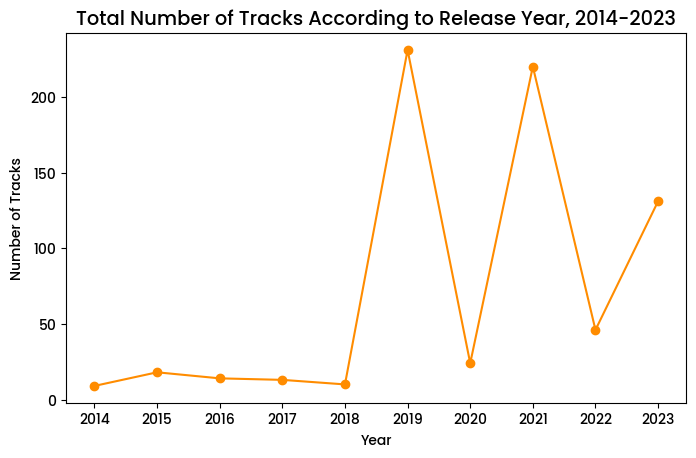

In [325]:
plt.figure().set_figwidth(8)

plt.plot(release_year_release_year, release_year_counts, color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.title("Total Number of Tracks According to Release Year, 2014-2023", fontsize = 14)

plt.xticks([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

# Display

plt.show()

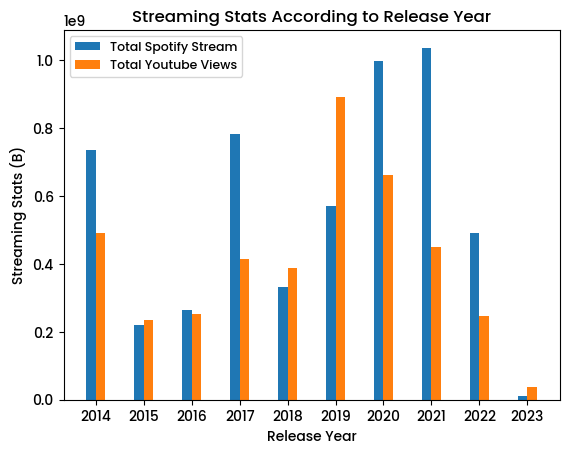

In [326]:
x_axis = np.arange(len(release_year_release_year))

plt.bar(x_axis-0.1, release_year_total_spotify_stream, width=0.2, label = 'Total Spotify Stream')
plt.bar(x_axis+0.1, release_year_total_youtube_views, width=0.2, label = 'Total Youtube Views')
  
plt.xlabel("Release Year")
plt.ylabel("Streaming Stats (B)")
plt.title("Streaming Stats According to Release Year")

plt.xticks(x_axis, release_year_release_year)

plt.legend(fontsize = 9)
plt.show()

### Top Tracks

In [327]:
top_10_spotify_tracks = pd.read_sql("SELECT ms.track_id, ms.track_title, mi.artist, mi.artist_2, ms.release_year, ms.spotify_stream FROM music_stream_stat as ms JOIN music_info as mi ON ms.track_id = mi.track_id WHERE spotify_bool = 'Yes' ORDER BY spotify_stream DESC LIMIT 10", db_connection)
top_10_spotify_tracks

,track_id,track_title,artist,artist_2,release_year,spotify_stream
0,9,Warriors,Imagine Dragons,None,2014,632826969
1,53,Legends Never Die,League of Legends,Against The Current,2017,514306989
2,552,STAR WALKIN' (League of Legends Worlds Anthem),None,Lil Nas X,2022,354581089
3,64,RISE (feat. The Word Alive),League of Legends,The Word Alive,2018,276973075
4,428,Enemy (from the series Arcane League of Legends),League of Legends,Imagine Dragons,2021,272240133
5,306,"MORE (feat. Lexie Liu, Jaira Burns, Seraphine ...",K/DA,Madison Beer,2020,210319446
6,316,THE BADDEST (feat. bea miller & League of Lege...,K/DA,(G)I-DLE,2020,178778799
7,69,Phoenix,League of Legends,Cailin Russo,2019,167033383
8,318,Warriors,League of Legends,2WEI,2020,166463250
9,299,Villain,K/DA,Madison Beer,2020,162982590


In [328]:
top_10_youtube_tracks = pd.read_sql("SELECT ms.track_id, ms.track_title, mi.artist, mi.artist_2, ms.release_year, ms.youtube_views FROM music_stream_stat as ms JOIN music_info as mi ON ms.track_id = mi.track_id WHERE youtube_bool = 'Yes' ORDER BY youtube_views DESC LIMIT 10", db_connection)
top_10_youtube_tracks

,track_id,track_title,artist,artist_2,release_year,youtube_views
0,9,Warriors,Imagine Dragons,None,2014,409766905
1,64,RISE (feat. The Word Alive),League of Legends,The Word Alive,2018,349647845
2,53,Legends Never Die,League of Legends,Against The Current,2017,251547855
3,428,Enemy (from the series Arcane League of Legends),League of Legends,Imagine Dragons,2021,242293978
4,68,"Giants (feat. SOYEON, DUCKWRTH, Thutmose & Lea...",True Damage,Becky G,2019,201614704
5,306,"MORE (feat. Lexie Liu, Jaira Burns, Seraphine ...",K/DA,Madison Beer,2020,191694343
6,553,The Call (feat. Edda Hayes),League of Legends,Edda Hayes,2022,154356596
7,318,Warriors,League of Legends,2WEI,2020,148670783
8,69,Phoenix,League of Legends,Cailin Russo,2019,139216887
9,15,Get Jinxed,League of Legends,None,2015,125482377


In [329]:
diff_spotify_youtube = pd.read_sql("SELECT track_id, track_title, release_year, spotify_stream - youtube_views as difference, abs(spotify_stream - youtube_views) as abs_diff FROM music_stream_stat WHERE spotify_bool = 'Yes' AND youtube_bool = 'Yes' ORDER BY abs_diff DESC", db_connection)
differences_spotify_youtube = diff_spotify_youtube["abs_diff"]
differences_spotify_youtube

0      296971853
1      262759134
2      223060064
3      129213510
4      112180778
         ...    
303        11380
304         6054
305         1046
306            0
307            0
Name: abs_diff, Length: 308, dtype: int64

In [330]:
differences_spotify_youtube.var()

911479083418966.2

## Success as a Game and Music

In [331]:
music_original_game = pd.read_sql("SELECT * FROM music_info WHERE category = 'Original Game'", db_connection)
music_original_game.head()

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail
0,10,Bit Rush,League of Legends,None,Dance,Bit Rush - Single,2015,02:31,151,Original Game,Skin Theme Release,Arcade
1,11,Demacia Rising,League of Legends,None,Soundtrack,The Music of League of Legends Volume 1,2015,04:08,248,Original Game,Original Game Soundtrack,None
2,12,Daylight's End,League of Legends,None,Soundtrack,The Music of League of Legends Volume 1,2015,03:46,226,Original Game,Original Game Soundtrack,None
3,13,Freljord,League of Legends,None,Soundtrack,The Music of League of Legends Volume 1,2015,03:31,211,Original Game,Original Game Soundtrack,None
4,14,Super Galaxy Rumble,League of Legends,None,Soundtrack,The Music of League of Legends Volume 1,2015,01:59,119,Original Game,Original Game Soundtrack,None


In [332]:
music_original_game_pivot = (pd.pivot_table(music_original_game,
                     index = ('category','release_for'),
                     columns = 'release_year',
                     values = 'track_id',
                     aggfunc = 'count')).fillna(0).astype(int)
music_original_game_pivot

release_year                            2015  2016  2019  2020  2021  2022  \
category      release_for                                                    
Original Game Champion Release             0     0    69     8     4     5   
              Champion Rework              0     0     1     2     3     1   
              In-game Event                1     0    21     0     1     1   
              Original Game Soundtrack    15     0    42     0     0     0   
              Skin Theme Release           1     2    67     2     6     5   

release_year                            2023  
category      release_for                     
Original Game Champion Release             3  
              Champion Rework              1  
              In-game Event                5  
              Original Game Soundtrack     0  
              Skin Theme Release           3

### Game Updates with Musics

In [333]:
music_for_gameupdates = pd.read_sql("SELECT release_year, COUNT(track_id) as counts FROM music_info WHERE category = 'Original Game' AND release_for <> 'Original Game Soundtrack' GROUP BY release_year", db_connection)
music_for_gameupdates

,release_year,counts
0,2015,2
1,2016,2
2,2019,158
3,2020,12
4,2021,14
5,2022,12
6,2023,12


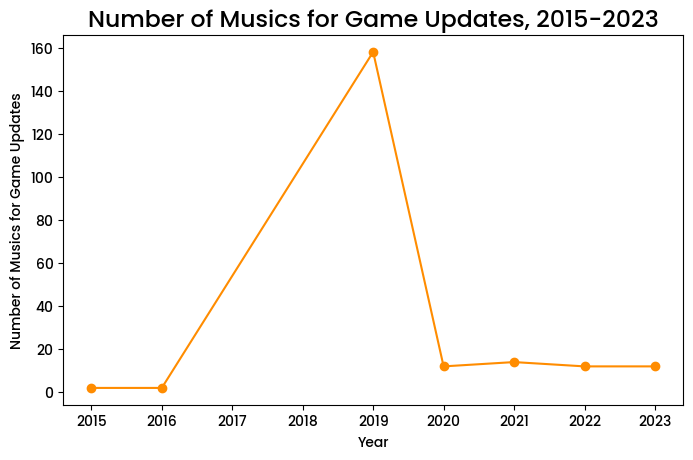

In [334]:
plt.figure().set_figwidth(8)

plt.plot(music_for_gameupdates["release_year"], music_for_gameupdates["counts"], color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Number of Musics for Game Updates")
plt.title("Number of Musics for Game Updates, 2015-2023", fontsize = 17)

plt.xticks([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])


# Display

plt.show()

### Game Updates

In [335]:
game_advanced = pd.read_sql("SELECT * FROM game_advanced", db_connection)
game_advanced.head()

,update_id,year,update_category,update_detail,update_fullname
0,0,2009,Champion Release,Alistar,the Minotaur
1,1,2009,Champion Release,Annie,the Dark Child
2,2,2009,Champion Release,Ashe,the Frost Archer
3,3,2009,Champion Release,Fiddlesticks,the Ancient Fear
4,4,2009,Champion Release,Jax,Grandmaster at Arms


In [336]:
game_advanced_year = pd.read_sql("SELECT year, count(update_id) as counts FROM game_advanced GROUP BY year", db_connection)

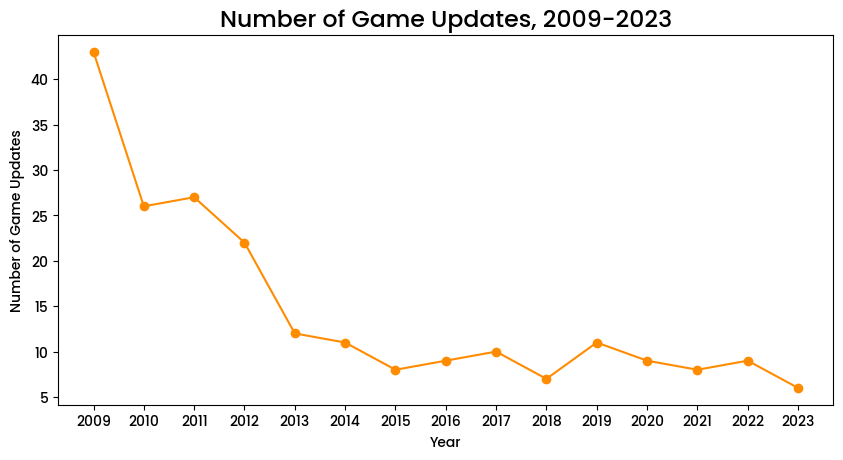

In [337]:
plt.figure().set_figwidth(10)

plt.plot(game_advanced_year["year"], game_advanced_year["counts"], color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Number of Game Updates")
plt.title("Number of Game Updates, 2009-2023", fontsize = 17)

plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])


# Display

plt.show()

### Game Updates With Music

In [338]:
gameupdates_with_music = pd.read_sql("SELECT B.year, COUNT(B.update_id) as counts FROM (SELECT *, CONCAT(release_for, ' ', release_for_detail) AS concat_1 FROM music_info WHERE category = 'Original Game') as A JOIN (SELECT *, CONCAT(update_category, ' ', update_detail) as concat_2 FROM game_advanced) as B ON A.concat_1 = B.concat_2 GROUP BY B.year", db_connection)
gameupdates_with_music

,year,counts
0,2009,8
1,2010,11
2,2011,2
3,2012,5
4,2013,8
5,2014,6
6,2015,7
7,2016,7
8,2017,10
9,2018,3


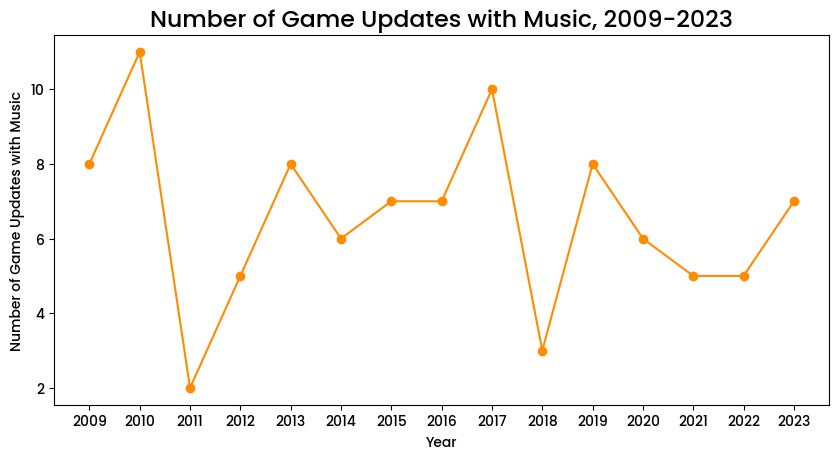

In [339]:
plt.figure().set_figwidth(10)

plt.plot(gameupdates_with_music["year"], gameupdates_with_music["counts"], color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Number of Game Updates with Music")
plt.title("Number of Game Updates with Music, 2009-2023", fontsize = 17)

plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])


# Display

plt.show()

### All Trends in One - Game Updates with Music

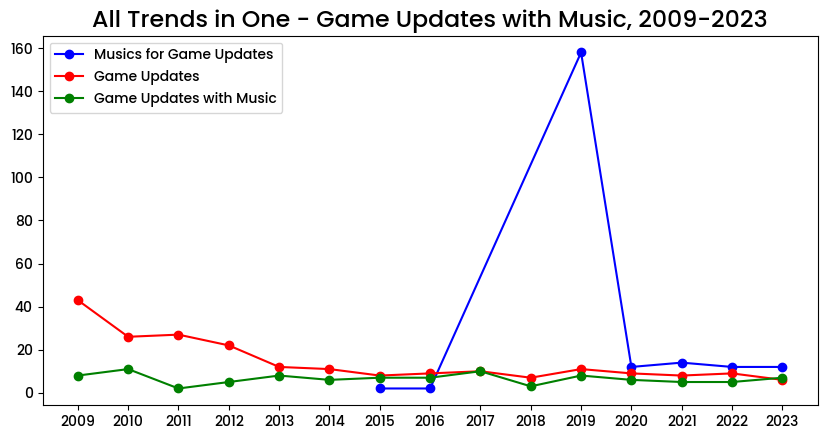

In [340]:
plt.figure().set_figwidth(10)

plt.plot(music_for_gameupdates["release_year"], music_for_gameupdates["counts"], label = 'Musics for Game Updates', color = "blue", marker = 'o')
plt.plot(game_advanced_year["year"], game_advanced_year["counts"], label = 'Game Updates', color = "red", marker = 'o')
plt.plot(gameupdates_with_music["year"], gameupdates_with_music["counts"], label = 'Game Updates with Music', color = "green", marker = 'o')

plt.title("All Trends in One - Game Updates with Music, 2009-2023", fontsize = 17)

plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

plt.legend()
plt.show()

## E-Sports Leader with Music

In [341]:
esports_events = pd.read_sql("SELECT * FROM esports_events", db_connection)
esports_events.head()

,event_id,year,category,event_name,event_location,peak_concurrent_viewership,peak_viewership,avg_viewership,hours_watched
0,1,2011,World Championship,2011 World Championship,Jönköping,210069.0,NaN,NaN,NaN
1,2,2012,World Championship,2012 World Championship,Los Angeles,1100000.0,NaN,NaN,NaN
2,3,2013,World Championship,2013 World Championship,Los Angeles,8500000.0,NaN,NaN,NaN
3,4,2013,All-Star Event,2013 League of Legends All-Star Event,Sanghai,NaN,NaN,NaN,NaN
4,5,2015,Mid - Season Invitational,2015 Mid - Season Invitational,Tallahassee,NaN,NaN,NaN,NaN


### World Championship Trends

In [342]:
esports_events_worlds = pd.read_sql("SELECT year, event_name, peak_viewership, round(peak_viewership / 1000000, 1) as peak_viewership_M, peak_viewership - lag(peak_viewership,1) over(ORDER BY year) as diff FROM esports_events WHERE category = 'World Championship'", db_connection)
esports_events_worlds

,year,event_name,peak_viewership,peak_viewership_M,diff
0,2011,2011 World Championship,NaN,NaN,NaN
1,2012,2012 World Championship,NaN,NaN,NaN
2,2013,2013 World Championship,NaN,NaN,NaN
3,2014,2014 World Championship,NaN,NaN,NaN
4,2015,2015 World Championship,NaN,NaN,NaN
5,2016,2016 World Championship,1620065.0,1.6,NaN
6,2017,2017 World Championship,2102206.0,2.1,482141.0
7,2018,2018 World Championship,2050475.0,2.1,-51731.0
8,2019,2019 World Championship,3985787.0,4.0,1935312.0
9,2020,2020 World Championship,3882252.0,3.9,-103535.0


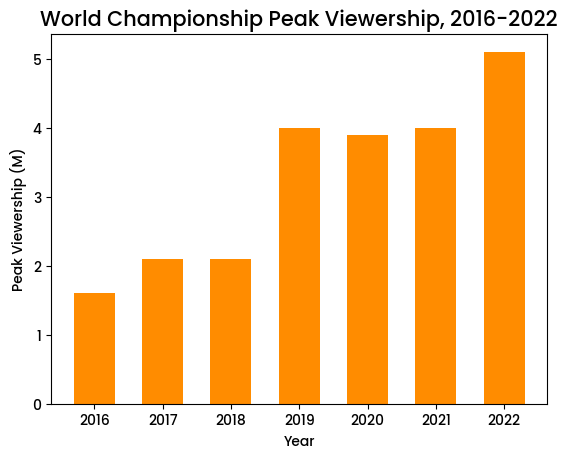

In [343]:
plt.bar(esports_events_worlds["year"], esports_events_worlds["peak_viewership_M"], width = 0.6, color = "darkorange")

# Labelling 

plt.xlabel("Year")
plt.ylabel("Peak Viewership (M)")
plt.title("World Championship Peak Viewership, 2016-2022", fontsize = 15)

plt.xticks([2016, 2017, 2018, 2019, 2020, 2021, 2022])


# Display

plt.show()

In [344]:
esports_theme_worlds = pd.read_sql("SELECT count(mi.track_id) as counts, sum(ms.spotify_stream) as total_spotify_stream, sum(ms.youtube_views) as total_youtube_views, ee.event_name, ee.year FROM music_stream_stat as ms JOIN music_info as mi ON ms.track_id = mi.track_id JOIN esports_events as ee ON mi.release_for_detail = ee.event_name WHERE ee.event_name LIKE '%World Championship' GROUP BY ee.event_name, ee.year", db_connection)
esports_theme_worlds

,counts,total_spotify_stream,total_youtube_views,event_name,year
0,1,632826969.0,409766905.0,2014 World Championship,2014
1,1,58427950.0,33336437.0,2015 World Championship,2015
2,2,67690164.0,98603400.0,2016 World Championship,2016
3,4,653594240.0,279430915.0,2017 World Championship,2017
4,4,315618449.0,380899680.0,2018 World Championship,2018
5,5,180749753.0,149560111.0,2019 World Championship,2019
6,3,79766413.0,85884889.0,2020 World Championship,2020
7,4,64503003.0,55836274.0,2021 World Championship,2021
8,2,355939048.0,58799396.0,2022 World Championship,2022


In [345]:
esports_theme_worlds_year = esports_theme_worlds["year"]
esports_theme_worlds_counts = esports_theme_worlds["counts"]
esports_theme_worlds_spotify = esports_theme_worlds["total_spotify_stream"]
esports_theme_worlds_youtube = esports_theme_worlds["total_youtube_views"]

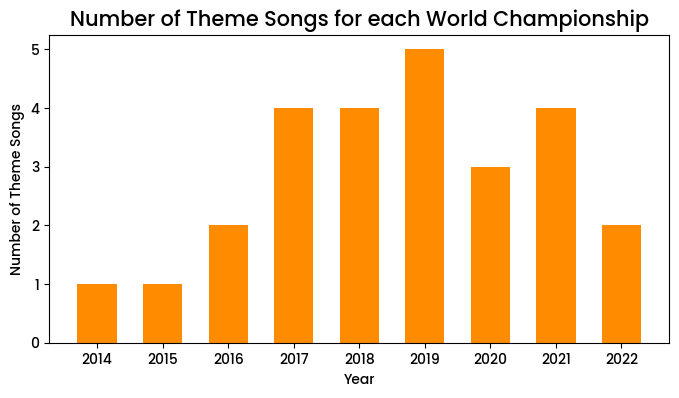

In [346]:
plt.figure(figsize=(8,4))

plt.bar(esports_theme_worlds_year, esports_theme_worlds_counts, width = 0.6, color = "darkorange", label = 'Number of Theme Songs')
  
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Number of Theme Songs", fontsize = 10)
plt.title("Number of Theme Songs for each World Championship", fontsize = 15)

plt.xticks([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

plt.show()

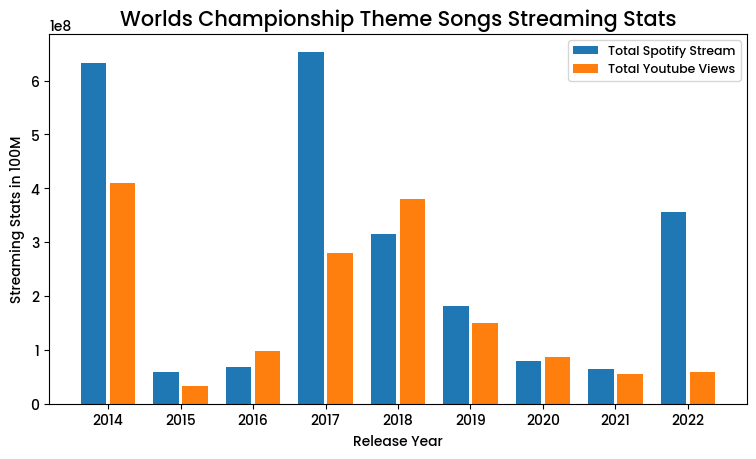

In [347]:
plt.figure().set_figwidth(9)

x_axis = np.arange(len(esports_theme_worlds_year))

plt.bar(x_axis-0.2, esports_theme_worlds_spotify, width=0.35, label = 'Total Spotify Stream')
plt.bar(x_axis+0.2, esports_theme_worlds_youtube, width=0.35, label = 'Total Youtube Views')
  
plt.xlabel("Release Year")
plt.ylabel("Streaming Stats in 100M")
plt.title("Worlds Championship Theme Songs Streaming Stats", fontsize= 15)

plt.xticks(x_axis, esports_theme_worlds_year)

plt.legend(fontsize=9)
plt.show()

### Other Events Trends

In [348]:
esports_events_others = pd.read_sql("SELECT year, category, event_name, peak_viewership FROM esports_events WHERE category <> 'World Championship'", db_connection)
esports_events_others.head()

,year,category,event_name,peak_viewership
0,2013,All-Star Event,2013 League of Legends All-Star Event,NaN
1,2015,Mid - Season Invitational,2015 Mid - Season Invitational,NaN
2,2014,All-Star Event,2014 League of Legends All-Star Event,NaN
3,2015,All-Star Event,2015 League of Legends All-Star Event,NaN
4,2016,Mid - Season Invitational,2016 Mid - Season Invitational,NaN


In [349]:
esports_theme_others = pd.read_sql("SELECT count(mi.track_id) as counts, sum(ms.spotify_stream) as total_spotify_stream, sum(ms.youtube_views) as total_youtube_views, ee.category, ee.event_name, ee.year FROM music_stream_stat as ms JOIN music_info as mi ON ms.track_id = mi.track_id JOIN esports_events as ee ON mi.release_for_detail = ee.event_name WHERE ee.event_name NOT LIKE '%World Championship' GROUP BY ee.category, ee.event_name, ee.year", db_connection)
esports_theme_others

,counts,total_spotify_stream,total_youtube_views,category,event_name,year
0,1,921495.0,139919.0,Mid - Season Invitational,2016 Mid - Season Invitational,2016
1,1,732311.0,355831.0,Mid - Season Invitational,2017 Mid - Season Invitational,2017
2,3,1517120.0,616943.0,Mid - Season Invitational,2018 Mid - Season Invitational,2018
3,1,2527783.0,456794.0,Rift Rivals,2018 Rift Rivals,2018
4,1,8808734.0,2320503.0,All-Star Event,2018 League of Legends All-Star Event,2018
5,1,19946525.0,8086530.0,Mid - Season Invitational,2019 Mid - Season Invitational,2019
6,1,2204105.0,623616.0,All-Star Event,2019 League of Legends All-Star Event,2019
7,1,17896096.0,2047613.0,All-Star Event,2020 League of Legends All-Star Event,2020
8,1,22013072.0,2149677.0,Mid - Season Invitational,2021 Mid - Season Invitational,2021
9,1,1844909.0,139999.0,LEC,2022 LEC Summer,2022


In [350]:
esports_theme_others_pivot = (pd.pivot_table(esports_theme_others,
                     index = 'category',
                     values = ('total_spotify_stream','total_youtube_views'),
                     aggfunc = ('mean'))).fillna(0).astype(int)
esports_theme_others_pivot

,total_spotify_stream,total_youtube_views
category,,
All-Star Event,9636311,1663910
LEC,926866,73888
Mid - Season Invitational,7830922,1988484
Rift Rivals,2527783,456794


## Musics for IP Variations

In [351]:
music_ip_variation = pd.read_sql("SELECT * FROM music_info WHERE category = 'IP Variation'", db_connection)
music_ip_variation.head()

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail
0,1,Thornmail,Pentakill,None,Metal,Smite and Ignite,2014,03:44,224,IP Variation,Project Group,Pentakill
1,2,Last Whisper,Pentakill,None,Metal,Smite and Ignite,2014,03:38,218,IP Variation,Project Group,Pentakill
2,3,Ohmwrecker,Pentakill,None,Metal,Smite and Ignite,2014,05:18,318,IP Variation,Project Group,Pentakill
3,4,The Prophecy,Pentakill,None,Metal,Smite and Ignite,2014,00:47,47,IP Variation,Project Group,Pentakill
4,5,Lightbringer,Pentakill,None,Metal,Smite and Ignite,2014,04:56,296,IP Variation,Project Group,Pentakill


In [352]:
music_ip_variation_pivot = (pd.pivot_table(music_ip_variation,
                     index = 'release_year',
                     values = 'track_id',
                     aggfunc = 'count')).fillna(0).astype(int)
music_ip_variation_pivot =music_ip_variation_pivot.reset_index()

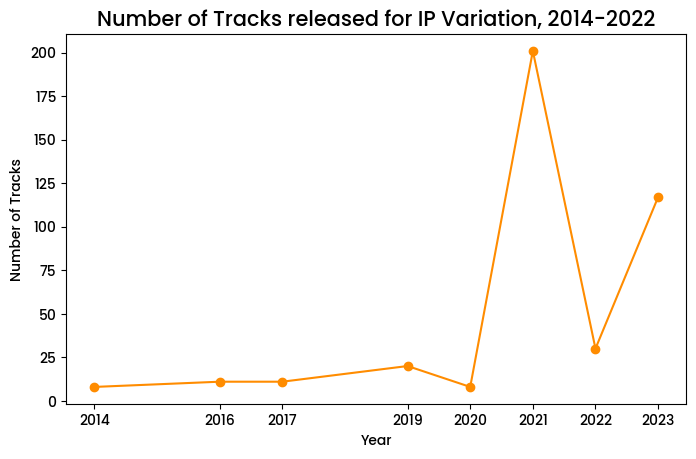

In [353]:
plt.figure().set_figwidth(8)

plt.plot(music_ip_variation_pivot["release_year"], music_ip_variation_pivot["track_id"], color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks released for IP Variation, 2014-2022", fontsize = 15)

plt.xticks([2014, 2016, 2017, 2019, 2020, 2021, 2022, 2023])


# Display

plt.show()

### Streaming Performance of IP Variation Tracks

In [354]:
music_stream_ip_variation = pd.read_sql("SELECT mi.category, mi.release_year, sum(ms.spotify_stream) as total_spotify_stream, sum(ms.youtube_views) as total_youtube_views FROM music_stream_stat as ms JOIN music_info as mi ON ms.track_id = mi.track_id WHERE mi.category = 'IP Variation' GROUP BY mi.category, mi.release_year ORDER BY mi.release_year", db_connection)
music_stream_ip_variation

,category,release_year,total_spotify_stream,total_youtube_views
0,IP Variation,2014,101943089.0,80327130.0
1,IP Variation,2016,181501831.0,128750091.0
2,IP Variation,2017,129764242.0,135653508.0
3,IP Variation,2019,246863277.0,444610048.0
4,IP Variation,2020,852339855.0,534193494.0
5,IP Variation,2021,933129545.0,371442794.0
6,IP Variation,2022,40279795.0,154356596.0
7,IP Variation,2023,4816582.0,18897943.0


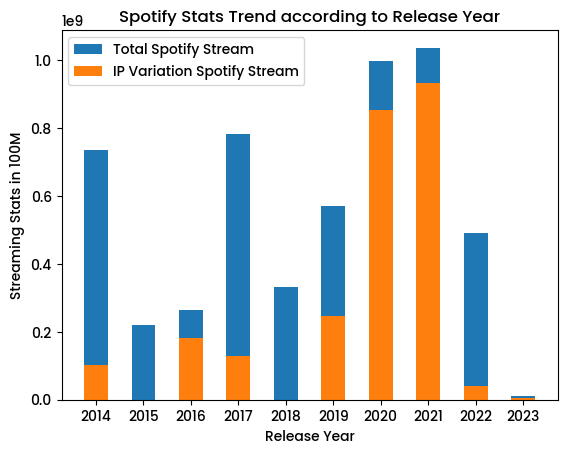

In [355]:
plt.bar(release_year_release_year, release_year_total_spotify_stream, width=0.5, label = 'Total Spotify Stream')
plt.bar(music_stream_ip_variation["release_year"], music_stream_ip_variation["total_spotify_stream"], width=0.5, label = 'IP Variation Spotify Stream')
  
plt.xlabel("Release Year")
plt.ylabel("Streaming Stats in 100M")
plt.title("Spotify Stats Trend according to Release Year")

plt.xticks([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])


plt.legend()
plt.show()

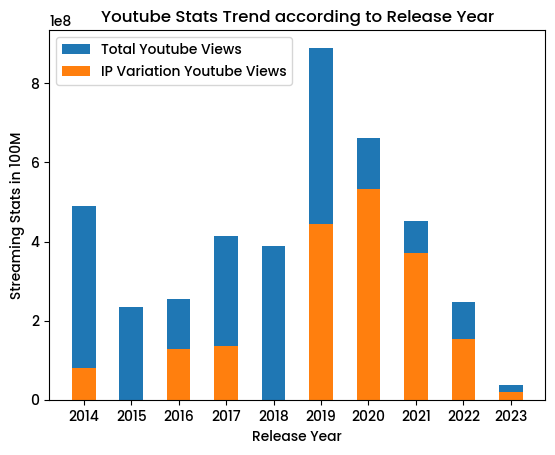

In [356]:
plt.bar(release_year_release_year, release_year_total_youtube_views, width=0.5, label = 'Total Youtube Views')
plt.bar(music_stream_ip_variation["release_year"], music_stream_ip_variation["total_youtube_views"], width=0.5, label = 'IP Variation Youtube Views')
  
plt.xlabel("Release Year")
plt.ylabel("Streaming Stats in 100M")
plt.title("Youtube Stats Trend according to Release Year")

plt.xticks([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])


plt.legend()
plt.show()

### Music for Original Story

In [357]:
music_original_story = music_ip_variation[(music_ip_variation['release_for'] == 'Original Story')]
music_original_story.head(3)

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail
37,261,Annie Origins - Burning (From League of Legend...,League of Legends,None,Soundtrack,The Music of League of Legends: Season 8 (Orig...,2019,01:26,86,IP Variation,Original Story,Annie Origins
38,262,Annie Origins - River (From League of Legends:...,League of Legends,None,Soundtrack,The Music of League of Legends: Season 8 (Orig...,2019,00:56,56,IP Variation,Original Story,Annie Origins
39,263,Annie Origins - Flower (From League of Legends...,League of Legends,None,Soundtrack,The Music of League of Legends: Season 8 (Orig...,2019,00:47,47,IP Variation,Original Story,Annie Origins


In [358]:
temp_a= music_original_story.groupby(by = 'release_for_detail').count()
music_original_story_breakdown = pd.DataFrame(temp_a['track_id'])
music_original_story_breakdown

,track_id
release_for_detail,
Annie Origins,7
Arcane League of Legends,101
Conv / Rgence: A League of Legends Story,48
The Mageseeker: A League of Legends Story,57


### Music for Cinematic and Related Games

In [359]:
music_cinematic_other = music_ip_variation[(music_ip_variation['release_for'] == 'Related Game') | (music_ip_variation['release_for']=='Cinematic')]
music_cinematic_other.head()

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail
19,42,As We Fall,League of Legends,None,Alternative,As We Fall - Single,2017,03:09,189,IP Variation,Cinematic,Varus
30,66,Awaken,League of Legends,Valerie Broussard,Alternative,Awaken - Single,2019,03:18,198,IP Variation,Cinematic,Awaken
32,74,Welcome to League of Legends - Cinematic (From...,League of Legends,None,Soundtrack,The Music of League of Legends: Season 1 (Orig...,2019,03:02,182,IP Variation,Cinematic,Welcome to League of Legends
33,130,Shurima - Rise of the Ascended (From League of...,League of Legends,None,Soundtrack,The Music of League of Legends: Season 4 (Orig...,2019,03:08,188,IP Variation,Cinematic,Shurima
34,131,Shurima - Descent into the Tomb (From League o...,League of Legends,None,Soundtrack,The Music of League of Legends: Season 4 (Orig...,2019,03:02,182,IP Variation,Cinematic,Shurima


In [360]:
temp_b= music_cinematic_other.groupby(by = 'release_for').count()
music_cinematic_other_breakdown = pd.DataFrame(temp_b['track_id'])
music_cinematic_other_breakdown

,track_id
release_for,
Cinematic,20
Related Game,16


### Music for Project Group

In [361]:
music_project_group = music_ip_variation[(music_ip_variation['release_for'] == 'Project Group')]
music_project_group.head()

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail
0,1,Thornmail,Pentakill,None,Metal,Smite and Ignite,2014,03:44,224,IP Variation,Project Group,Pentakill
1,2,Last Whisper,Pentakill,None,Metal,Smite and Ignite,2014,03:38,218,IP Variation,Project Group,Pentakill
2,3,Ohmwrecker,Pentakill,None,Metal,Smite and Ignite,2014,05:18,318,IP Variation,Project Group,Pentakill
3,4,The Prophecy,Pentakill,None,Metal,Smite and Ignite,2014,00:47,47,IP Variation,Project Group,Pentakill
4,5,Lightbringer,Pentakill,None,Metal,Smite and Ignite,2014,04:56,296,IP Variation,Project Group,Pentakill


In [362]:
temp_c= music_project_group.groupby(by = 'release_for_detail').count()
music_project_group_breakdown = pd.DataFrame(temp_c['track_id'])
music_project_group_breakdown

,track_id
release_for_detail,
K/DA,7
Pentakill,29
True Damage,1


## Arcane Case Study

In [363]:
arcane_music = pd.read_sql("SELECT mi.*, ms.spotify_stream, ms.youtube_views FROM music_info as mi JOIN music_stream_stat as ms ON mi.track_id = ms.track_id WHERE mi.release_for_detail LIKE '%Arcane%'", db_connection)
arcane_music.head()

,track_id,track_title,artist,artist_2,genre,album_title,release_year,duration,duration_second,category,release_for,release_for_detail,spotify_stream,youtube_views
0,322,A Story of Opposites,Arcane,None,Soundtrack,Arcane League of Legends (Original Score from ...,2021,01:48,108,IP Variation,Original Story,Arcane League of Legends,492310,0
1,323,The Bridge,Arcane,Ray Chen,Soundtrack,Arcane League of Legends (Original Score from ...,2021,01:43,103,IP Variation,Original Story,Arcane League of Legends,3833290,0
2,324,You're Stronger Than You Think,Arcane,Kelci Hahn,Soundtrack,Arcane League of Legends (Original Score from ...,2021,01:30,90,IP Variation,Original Story,Arcane League of Legends,1258499,0
3,325,Someone Just Volunteered,Arcane,None,Soundtrack,Arcane League of Legends (Original Score from ...,2021,03:01,181,IP Variation,Original Story,Arcane League of Legends,655077,0
4,326,Some Mysteries Are Better Left Unsolved,Arcane,None,Soundtrack,Arcane League of Legends (Original Score from ...,2021,01:48,108,IP Variation,Original Story,Arcane League of Legends,98065,0


### Number of Tracks and Albums

In [364]:
arcane_breakdown = pd.read_sql("SELECT ai.album_detail, count(distinct ai.album_id) as album_counts, count(mi.track_id) as track_counts FROM music_info as mi JOIN music_stream_stat as ms ON mi.track_id = ms.track_id JOIN album_info as ai ON mi.album_title = ai.album_title WHERE mi.release_for_detail LIKE '%Arcane%' GROUP BY ai.album_detail", db_connection)
arcane_breakdown

,album_detail,album_counts,track_counts
0,Album,3,90
1,Single,1,1


In [365]:
arcane_music[['track_id', 'track_title', 'spotify_stream', 'youtube_views']]

,track_id,track_title,spotify_stream,youtube_views
0,322,A Story of Opposites,492310,0
1,323,The Bridge,3833290,0
2,324,You're Stronger Than You Think,1258499,0
3,325,Someone Just Volunteered,655077,0
4,326,Some Mysteries Are Better Left Unsolved,98065,0
...,...,...,...,...
96,535,Guns for Hire,40011304,9728185
97,536,Misfit Toys,34240710,7782128
98,537,Dynasties & Dystopia,81075721,14925630
99,538,Snakes,50717031,12773673


In [366]:
arcane_spotify_top_5 = arcane_music[['track_id', 'track_title', 'spotify_stream']].sort_values("spotify_stream", ascending=False).head(5)
arcane_spotify_top_5

,track_id,track_title,spotify_stream
90,428,Enemy (from the series Arcane League of Legends),272240133
92,531,Playground,95632756
98,537,Dynasties & Dystopia,81075721
99,538,Snakes,50717031
100,539,What Could Have Been,50651400


In [367]:
arcane_music["spotify_stream"].sum()

793395206

In [368]:
arcane_youtube_top_5 = arcane_music[['track_id', 'track_title', 'youtube_views']].sort_values("youtube_views", ascending=False).head(5)
arcane_youtube_top_5

,track_id,track_title,youtube_views
90,428,Enemy (from the series Arcane League of Legends),242293978
98,537,Dynasties & Dystopia,14925630
100,539,What Could Have Been,14043080
99,538,Snakes,12773673
92,531,Playground,12715310


In [369]:
arcane_music["youtube_views"].sum()

337095319